# <center>**Behavioural Segmentation of EVs**<center>

---



---



**Import all the necessary Library**

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import kaleido

Social demographic data like age,gender,income,based on which we could know which people to target

In [2]:
# This data contains the details about consumers who purchased an EV
df = pd.read_csv("behavioural_dataset.csv")

In [3]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


###**Information about Dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


### Description of dataset

In [5]:
df.describe()

,Age,No of Dependents,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,2.270707e+06,1.194040e+06
std,6.246054,1.335265,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.700000e+06,1.500000e+06
max,51.000000,4.000000,5.200000e+06,3.000000e+06


In [6]:
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64

No null value is present in the dataset

In [7]:
df.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
df.rename(columns={'Price':'EV_Price'},inplace=True)
df.head()


,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


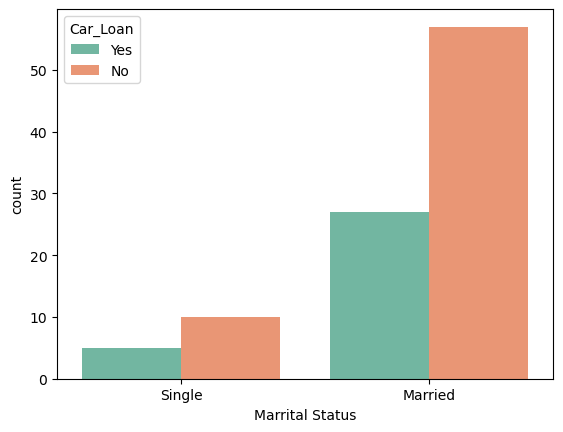

In [8]:
# Plotting the Car loan status with respect to Marrital Status
sns.countplot(x ='Marrital Status', hue = 'Car_Loan',  data = df, palette = 'Set2')
plt.show()

**How many percentage of person are married**

In [9]:
import math
a =(df['Marrital Status'].value_counts()['Married'])/((df['Marrital Status'].value_counts()['Married'])+(df['Marrital Status'].value_counts()['Single']))*100
print(math.floor(a),'%')

84 %


**How many person take loan for buying car** 

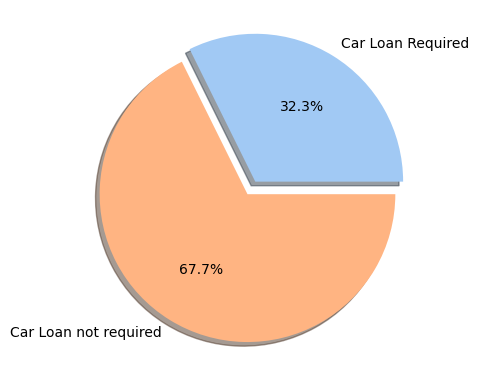

In [10]:
#Getting labels and data
labels = ['Car Loan Required','Car Loan not required']
Loan_status = [df.query('Car_Loan == "Yes"').Car_Loan.count(),df.query('Car_Loan == "No"').Car_Loan.count()]

# declaring exploding pie
explode = [0.1, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
  
# plotting data on chart
plt.pie(Loan_status, labels=labels, colors=palette_color, shadow = "True",
        explode=explode, autopct='%1.1f%%')
  
# displaying chart
plt.show()

**Plot the frequency of consumer features - Age, No. of dependents , Total Salary , EV_price**

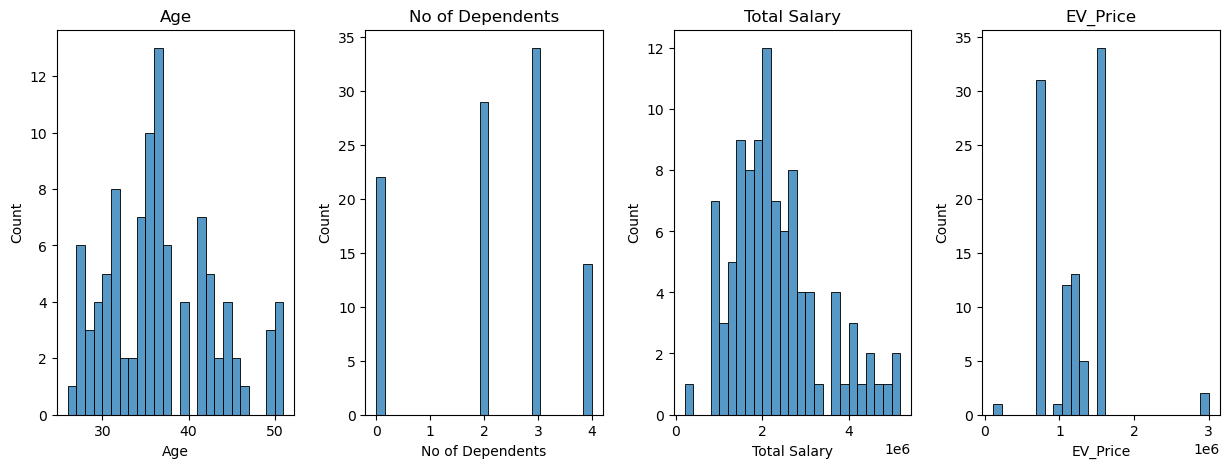

In [11]:
plt.figure(1, figsize=(15,5))
n=0

for x in ['Age', 'No of Dependents' ,'Total Salary'  ,'EV_Price']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.3, wspace=0.3)
  sns.histplot(df[x], bins= 25)
  plt.title(f'{x}')
plt.show()

Kmodes is similar to K means clustering when computing distance for continuous data using mean but for categorical data it uses the mode
Frequency based dissimilarity measure

 Hence it is more preferrable for clustering multiple datatypes 


## <center>**Now we create cluster for customer** 

In [12]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes

In [13]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [14]:
cluster_features = list(df.columns)
cluster_data = df[cluster_features].values

In [15]:
cluster_data[:,0]

array([27, 35, 45, 41, 31, 28, 31, 33, 34, 34, 35, 35, 29, 30, 31, 49, 26,
       27, 29, 30, 37, 35, 36, 35, 35, 35, 35, 36, 36, 36, 41, 41, 41, 43,
       42, 42, 29, 30, 30, 31, 31, 32, 32, 34, 34, 34, 36, 36, 36, 36, 49,
       49, 44, 44, 41, 41, 41, 27, 27, 28, 28, 30, 31, 31, 31, 39, 39, 39,
       39, 37, 37, 37, 37, 35, 36, 36, 36, 36, 44, 45, 46, 44, 43, 42, 42,
       42, 29, 33, 34, 34, 35, 36, 37, 27, 27, 50, 51, 51, 51],
      dtype=object)

In [16]:
#change the datatype
cluster_data[:, 0] = cluster_data[:, 0].astype(float)
cluster_data[:, 4] = cluster_data[:, 4].astype(float)
cluster_data[:, 6] = cluster_data[:, 6].astype(float)
cluster_data[:, 7] = cluster_data[:, 7].astype(float)

**Finding optimal number of clusters for KPrototypes**

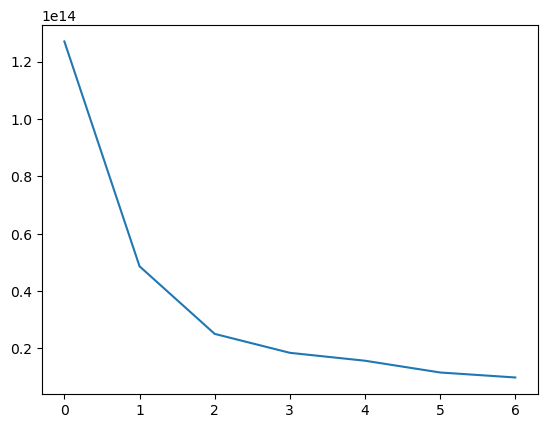

In [17]:
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(cluster_data, categorical=[1,2,3,5])
    cost.append(kproto.cost_)

plt.plot(cost)
plt.show()

In [18]:
cost

[126979657487180.34,
 48631729380526.18,
 25087753148183.234,
 18491809410726.285,
 15735389709414.992,
 11636836256958.104,
 9899011952147.764]

**fitting data to cluster

In [19]:
kproto = KPrototypes(n_clusters=2, verbose=2,max_iter=20)
clusters = kproto.fit_predict(cluster_data, categorical=[1,2,3,5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 38, ncost: 60593966305440.77
Run: 1, iteration: 2/20, moves: 20, ncost: 50447073534650.24
Run: 1, iteration: 3/20, moves: 3, ncost: 50057040964014.66
Run: 1, iteration: 4/20, moves: 1, ncost: 50020391397205.32
Run: 1, iteration: 5/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 7, ncost: 48631729380526.18
Run: 2, iteration: 2/20, moves: 0, ncost: 48631729380526.18
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 3, ncost: 49650723166357.79
Run: 3, iteration: 2/20, moves: 4, ncost: 48777842651066.98
Run: 3, iteration: 3/20, moves: 0, ncost: 48777842651066.98
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Ru

In [20]:
#Appending the cluster data
df['Cluster'] = clusters

In [21]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price,Cluster
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000,1
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000,1
2,45,Business,Married,Graduate,4,Yes,1800000,1200000,1
3,41,Business,Married,Post Graduate,3,No,2200000,1200000,1
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000,1


In [22]:
# Average cost of the EV
df.EV_Price.mean()

1194040.4040404041

In [23]:
# Average cost of a car in segment 1 
df.EV_Price[df.Cluster==0].mean()

1633333.3333333333

In [24]:
# Average cost of a car in segment 1 
df.EV_Price[df.Cluster==1].mean()

1029305.5555555555

In [25]:
df['EV_Price'][df.Cluster==1].max()

1600000

In [26]:
# Average cost of a car in segment 1 
df.EV_Price[df.Cluster==1].mean()

1029305.5555555555

In [27]:
df['Cluster'].value_counts(normalize=True) * 100

1    72.727273
0    27.272727
Name: Cluster, dtype: float64

**Segregrating  each cluster**

In [28]:
Cluster_0 = df[df.Cluster==0]
Cluster_1 = df[df.Cluster==1]

In [29]:
df['Cluster'].value_counts()

1    72
0    27
Name: Cluster, dtype: int64

**Plotting the effect of salary and evs price on cluster data**

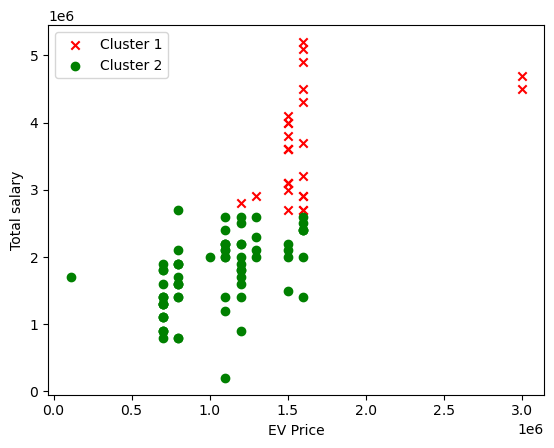

In [30]:
plt.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],color='green', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Total salary')
plt.show()

There is a clear difference in segments when comparing salary and price of EV purchased

**Plotting the effect of age and evs price on cluster data**

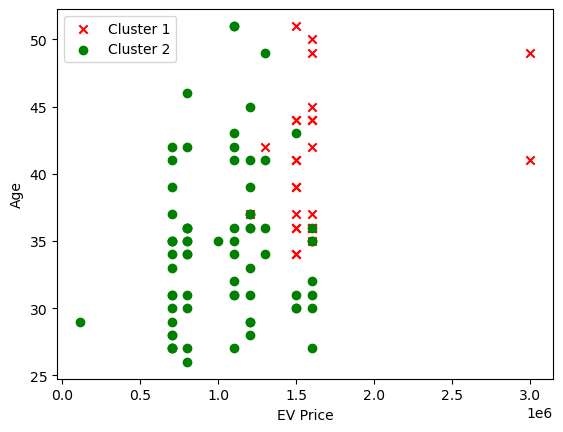

In [31]:
plt.scatter(Cluster_0.EV_Price, Cluster_0['Age'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Age'],color='green', label = 'Cluster 2')
plt.legend(loc = "upper left")

plt.xlabel('EV Price')
plt.ylabel('Age')
plt.show()

In [32]:
from mpl_toolkits.mplot3d import Axes3D

**plotting influence of age**

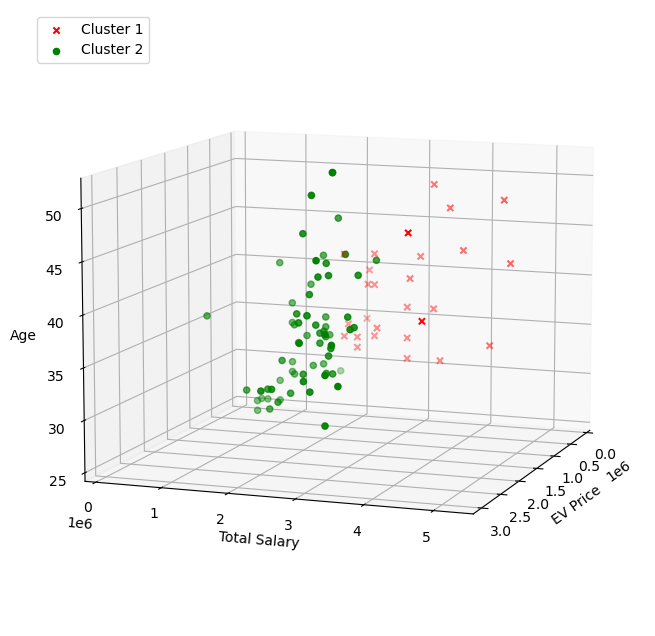

In [33]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], Cluster_0['Age'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],Cluster_1['Age'], color='green', label = 'Cluster 2')
plt.legend(loc = 'upper left')

ax.view_init(10, 20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('Age')
plt.show()

In [34]:
df['No of Dependents'].value_counts()

3    34
2    29
0    22
4    14
Name: No of Dependents, dtype: int64

**plotting the effct of no of dependents and ev price on cluster data**



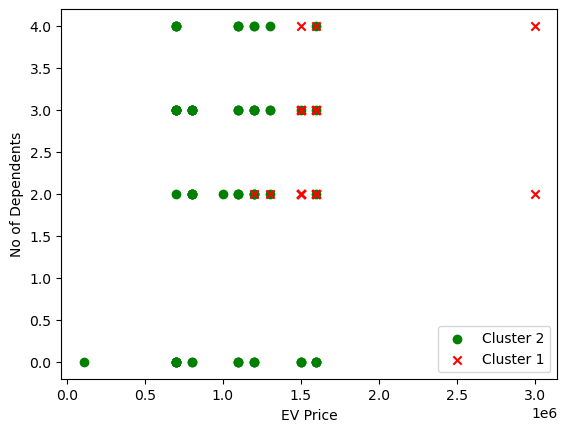

In [35]:
plt.scatter(Cluster_1.EV_Price, Cluster_1['No of Dependents'],color='green', label = 'Cluster 2')
plt.scatter(Cluster_0.EV_Price, Cluster_0['No of Dependents'],color='red', marker = 'x', label = 'Cluster 1')
plt.legend(loc="lower right")

plt.xlabel('EV Price')
plt.ylabel('No of Dependents')
plt.show()

there is a clear difference in segments when comparing salary and the price of EV purchased